In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from fmincg import fmincg

# Importing data

In [2]:
data = loadmat('ex3data1.mat')

In [3]:
X = data['X']
y = data['y']
m,n = X.shape

In [4]:
input_layer_size  = 400;
num_labels = 10;

## defining functions

In [5]:
def displayk2(X,k=10):
    '''function to display numbers data
    k is number of image in one row'''
    m,n = X.shape
    side = int(np.sqrt(n))
    X = X.reshape(k,k*side,side).transpose(0,2,1).reshape(k*side,k*side)
    plt.figure()
    plt.imshow(X , cmap = 'Greys')

def sigmoid(z):
    return 1/(1+np.e**-z)

def lrCostFunction(theta, X, y, lamda):
    '''logistic cost function'''
    theta = theta.reshape((-1,1))
    y = y.reshape((-1,1))
    #print(np.shape(X) , (initial_theta))
    h = sigmoid(X@theta)
    thetareg = theta.copy()
    thetareg[0]=0
    m = len(y)
    J = (-1/m)*(y.T @ np.log(h) + (1-y).T @np.log(1-h) - (lamda/2)*(thetareg.T @ thetareg))
    grad = (1/m) * ((X.T @(h-y)) + (lamda * thetareg))
    return J.item(),grad

def onevsall(X, y, num_labels, lamda):
    '''function to train onevsall model based on logistic regression'''
    y = y.reshape(-1,1)
    m,n = X.shape
    all_theta = np.zeros((num_labels,n))
    inith = np.zeros((n,1))
    options = {'maxiter':50,'GradObj': 'On'}
    for i in range(1,num_labels+1):
        ytemp = (y==i).astype(int)
        theta, Jrec, *_ = fmincg(lambda th : lrCostFunction(th,X,ytemp,lamda) , inith ,options)
        all_theta[i-1] = theta.T
    return all_theta

def predicting(all_theta, X):
    '''function to predict output for onevsall'''
    return np.argmax(X @ all_theta.T , axis=1).reshape(-1,1)+1

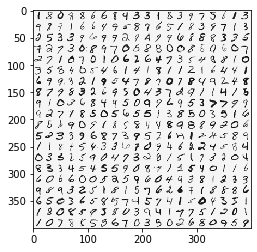

In [6]:
### displaying data of numbers
X_disp = X[(np.random.permutation(X.shape[0]))[:400]]
displayk2(X_disp,20)

In [7]:
#adding ones column to X
X = np.hstack((np.ones((m,1)), X))

In [8]:
## testing 
theta_t = np.array([-2, -1, 1, 2]).reshape(-1,1)
X_t = np.hstack((np.ones((5,1)), np.arange(1,16).reshape(3,5).T/10))
y_t = np.array([1,0,1,0,1]).reshape(-1,1)
lamda_t = 3
lrCostFunction(theta_t, X_t, y_t, lamda_t)
#(2.5348193961097443,array([[ 0.14656137],[-0.54855841],[ 0.72472227],[ 1.39800296]])).T

(2.5348193961097443,
 array([[ 0.14656137],
        [-0.54855841],
        [ 0.72472227],
        [ 1.39800296]]))

In [9]:
theta_cal = onevsall(X, y ,num_labels , 0.1)

C:\Users\Priyant\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
C:\Users\Priyant\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in matmul
E:\Priyant\ML_andrew\python implementaton\ex3\fmincg.py:109: RuntimeWarning: invalid value encountered in less
  while ((f2 > f1+np.dot(np.dot(z1,RHO),d1)) or (d2 > np.dot(-SIG, d1))) and (M > 0):
E:\Priyant\ML_andrew\python implementaton\ex3\fmincg.py:136: RuntimeWarning: invalid value encountered in sqrt
  z2 = -np.dot(np.dot(d2,z3),z3)/(B+np.sqrt(np.dot(B,B)-np.dot(np.dot(np.dot(A,d2),z3),z3)))        # num. error possible - ok!


In [10]:
#train accuracy 94.62%
np.mean(predicting(theta_cal,X)==y)*100

94.62